In [1]:
import pandas as pd
import numpy as np
import plot_utils

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
sig = pd.read_csv('~/WhenMutationsDontMatter/PIK3CA/csv_files/proteomics_sig.csv', index_col=0)
sig.head()

,Difference_In_Median_Brca,P_Value_Brca,Difference_In_Median_Endo,P_Value_Endo,Difference_In_Median,P_Value
A2ML1,NaN,NaN,1.10585,0.037044,NaN,NaN
AADAT,-1.33200,0.027477,NaN,NaN,NaN,NaN
AAGAB,NaN,NaN,NaN,NaN,0.139,0.039189
AASDHPPT,0.51445,0.003620,NaN,NaN,NaN,NaN
AATF,-0.16905,0.042271,NaN,NaN,NaN,NaN


In [31]:
full_brca_df = sig[['Difference_In_Median_Brca', 'P_Value_Brca']]
full_brca_df = full_brca_df.dropna(how='all')
full_brca_df

,Difference_In_Median_Brca,P_Value_Brca
AADAT,-1.33200,0.027477
AASDHPPT,0.51445,0.003620
AATF,-0.16905,0.042271
ABCA13,0.63735,0.021190
ABCC5,0.68955,0.049308
...,...,...
ZNF24,-0.47160,0.021202
ZNF385A,0.93700,0.019012
ZNF629,-0.20970,0.036093
ZNF654,0.49290,0.048872


In [34]:
full_endo_df = sig[['Difference_In_Median_Endo', 'P_Value_Endo']]
full_endo_df = full_endo_df.dropna(how='all')
full_endo_df

,Difference_In_Median_Endo,P_Value_Endo
A2ML1,1.105850,0.037044
ABL1,-0.161000,0.027486
ACADVL,0.390900,0.025435
ACE,-0.598600,0.018149
ACOT9,0.371045,0.010161
...,...,...
ZCCHC9,0.273000,0.035275
ZFX,-0.102335,0.025764
ZNF331,-0.335900,0.013401
ZNHIT3,0.138950,0.029161


In [35]:
full_colon_df = sig[['Difference_In_Median', 'P_Value']]
full_colon_df = full_colon_df.dropna(how='all')
full_colon_df

,Difference_In_Median,P_Value
AAGAB,0.13900,0.039189
ABHD16A,-0.19120,0.035684
ACOT9,-0.24950,0.029555
AES,0.76950,0.000167
AIFM1,-0.29250,0.045817
...,...,...
VANGL1,0.78150,0.009708
WDR89,0.49400,0.044098
YBX1,0.31000,0.023125
ZHX2,0.22205,0.040977


In [3]:
def colon(row):
    if (row["Difference_In_Median"] > 0):
        return True
    else: 
        return False

In [4]:
def endo(row):
    if (row["Difference_In_Median_Endo"] > 0):
        return True
    else: 
        return False

In [5]:
def brca(row):
    if (row["Difference_In_Median_Brca"] > 0):
        return True
    else: 
        return False

In [6]:
medians = sig.drop(columns= ['P_Value_Brca','P_Value_Endo','P_Value'])
medians.head()

,Difference_In_Median_Brca,Difference_In_Median_Endo,Difference_In_Median
A2ML1,NaN,1.10585,NaN
AADAT,-1.33200,NaN,NaN
AAGAB,NaN,NaN,0.139
AASDHPPT,0.51445,NaN,NaN
AATF,-0.16905,NaN,NaN


In [7]:
medians["Pos_Neg"] = medians.apply(colon, axis = 1)
pos_and_neg = medians.loc[medians['Pos_Neg'] == True]
colon_genes = list(pos_and_neg.index)
len(colon_genes)

84

In [8]:
medians["Pos_Neg"] = medians.apply(endo, axis = 1)
pos_and_neg = medians.loc[medians['Pos_Neg'] == True]
endo_genes = list(pos_and_neg.index)
len(endo_genes)

218

In [9]:
medians["Pos_Neg"] = medians.apply(brca, axis = 1)
pos_and_neg = medians.loc[medians['Pos_Neg'] == True]
brca_genes = list(pos_and_neg.index)
len(brca_genes)

235

In [10]:
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt

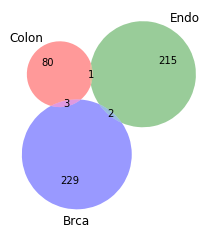

In [11]:
venn3([set(colon_genes), set(endo_genes), set(brca_genes)], 
      set_labels = ('Colon', 'Endo', 'Brca'))

In [12]:
print("The intersection of colon and endo: ", list(set(colon_genes).intersection(set(endo_genes))))
print("The intersection of colon and brca: ", list(set(colon_genes).intersection(set(brca_genes))))
print("The intersection of brca and endo: ", list(set(brca_genes).intersection(set(endo_genes))))

The intersection of colon and endo:  ['NUBP1']
The intersection of colon and brca:  ['TNKS1BP1', 'ELP4', 'LRSAM1']
The intersection of brca and endo:  ['SH2D4A', 'KRT15']


In [13]:
only_colon = set(colon_genes).difference(set(endo_genes))
only_colon = set(only_colon).difference(set(brca_genes))
len(only_colon)

only_brca = set(brca_genes).difference(set(endo_genes))
only_brca = set(only_brca).difference(set(colon_genes))
len(only_brca)

only_endo = set(endo_genes).difference(set(brca_genes))
only_endo = set(only_endo).difference(set(colon_genes))
len(only_endo)

215

In [14]:
only_brca

{'AASDHPPT',
 'ABCA13',
 'ABCC5',
 'ABCF3',
 'ABL1',
 'ACAP2',
 'ACVR1',
 'ADAMTS12',
 'AGPAT3',
 'ANO10',
 'ANXA8',
 'ANXA8L1',
 'AP2A1',
 'AP2M1',
 'ARHGEF12',
 'ARL4C',
 'ARMC5',
 'ARMC9',
 'ARNT',
 'ASCC3',
 'ATG4A',
 'ATM',
 'ATXN3',
 'BCL9L',
 'BECN1',
 'C19orf25',
 'C1orf167',
 'C22orf29',
 'C4B',
 'C5orf51',
 'CALML3',
 'CAMK4',
 'CAMSAP1',
 'CAND1',
 'CAPN13',
 'CAPN9',
 'CBL',
 'CD99',
 'CDK14',
 'CDKN2AIPNL',
 'CDS2',
 'CEP164',
 'CIZ1',
 'CLCA2',
 'CLCN5',
 'CLK1',
 'CNPY4',
 'COL16A1',
 'COL17A1',
 'COL24A1',
 'COL5A1',
 'COL5A2',
 'COL5A3',
 'COL7A1',
 'CST6',
 'CYB5A',
 'DCUN1D1',
 'DLG1',
 'DNAJC13',
 'DNAJC21',
 'DOCK1',
 'DPAGT1',
 'DPM1',
 'DST',
 'EFNA1',
 'EI24',
 'EIF4G1',
 'ELP3',
 'ELP6',
 'EMILIN1',
 'EML6',
 'ENAH',
 'ERMP1',
 'EVI5L',
 'EXT2',
 'FAM102A',
 'FAM120A',
 'FAM160B1',
 'FBLN5',
 'FBXO4',
 'FGFRL1',
 'FN1',
 'FOCAD',
 'FOXO3',
 'FRMD6',
 'FYTTD1',
 'GALNT10',
 'GNAI3',
 'GOLGA1',
 'GOLIM4',
 'GOSR2',
 'GSK3B',
 'GTF3C1',
 'HACE1',
 'HEATR5A',
 'HEC

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import gseapy as gp
from gseapy.plot import barplot, dotplot

In [16]:
enr = gp.enrichr(gene_list = list(only_colon), description='up_in_colon', gene_sets='Reactome_2016', 
                       outdir='test/enrichr_kegg__pos_neg_corr')
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Processing of Capped Intron-Containing Pre-mRN...,8/193,0.000001,0.001593,0,0,10.362694,142.749190,PHF5A;SNRPD2;METTL3;PCBP2;THOC3;YBX1;HNRNPA1;S...
1,Reactome_2016,mRNA Splicing - Major Pathway Homo sapiens R-H...,6/134,0.000016,0.012377,0,0,11.194030,123.490438,PHF5A;SNRPD2;PCBP2;YBX1;HNRNPA1;SRSF9
2,Reactome_2016,mRNA Splicing Homo sapiens R-HSA-72172,6/144,0.000024,0.012410,0,0,10.416667,110.662986,PHF5A;SNRPD2;PCBP2;YBX1;HNRNPA1;SRSF9
3,Reactome_2016,Purine ribonucleoside monophosphate biosynthes...,2/12,0.001016,0.388643,0,0,41.666667,287.159236,IMPDH1;GART
4,Reactome_2016,Signaling by PTK6 Homo sapiens R-HSA-8848021,3/67,0.002456,0.751436,0,0,11.194030,67.268897,KHDRBS1;RASAL1;KRAS
...,...,...,...,...,...,...,...,...,...,...
258,Reactome_2016,Cellular responses to stress Homo sapiens R-HS...,1/367,0.773405,1.000000,0,0,0.681199,0.175035,RBBP4
259,Reactome_2016,"Cell Cycle, Mitotic Homo sapiens R-HSA-69278",1/462,0.846402,1.000000,0,0,0.541126,0.090239,RBBP4
260,Reactome_2016,Signaling by GPCR Homo sapiens R-HSA-372790,3/1293,0.897447,1.000000,0,0,0.580046,0.062761,ARHGEF18;RASAL1;KRAS
261,Reactome_2016,Cell Cycle Homo sapiens R-HSA-1640170,1/566,0.899867,1.000000,0,0,0.441696,0.046603,RBBP4


In [17]:
enr = gp.enrichr(gene_list = list(only_brca), description='up_in_brca', gene_sets='Reactome_2016', 
                       outdir='test/enrichr_kegg__pos_neg_corr')
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Extracellular matrix organization Homo sapiens...,20/283,1.030745e-10,1.577040e-07,0,0,6.172173,141.932624,COL17A1;COL16A1;COL24A1;LAMB3;DST;TGFB3;LAMA1;...
1,Reactome_2016,Intra-Golgi and retrograde Golgi-to-ER traffic...,14/179,1.991038e-08,1.523144e-05,0,0,6.830768,121.123341,NBAS;GOSR2;SURF4;STX18;GOLIM4;RABEPK;AGPAT3;RI...
2,Reactome_2016,Collagen formation Homo sapiens R-HSA-1474290,10/85,4.702463e-08,2.398256e-05,0,0,10.274852,173.363415,COL17A1;COL16A1;DST;LAMB3;COL24A1;COL5A1;COL5A...
3,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,20/420,8.741343e-08,3.343564e-05,0,0,4.158869,67.592501,NBAS;SEC23A;SEC16A;GOSR2;STX18;SURF4;GOLIM4;RA...
4,Reactome_2016,Assembly of collagen fibrils and other multime...,8/54,1.728349e-07,5.288748e-05,0,0,12.938703,201.467623,DST;LAMB3;COL24A1;COL5A1;COL5A3;COL7A1;COL5A2;...
...,...,...,...,...,...,...,...,...,...,...
637,Reactome_2016,G alpha (i) signalling events Homo sapiens R-H...,1/240,9.379969e-01,1.000000e+00,0,0,0.363901,0.023293,GNAI3
638,Reactome_2016,SLC-mediated transmembrane transport Homo sapi...,1/268,9.552727e-01,1.000000e+00,0,0,0.325882,0.014912,SLC12A1
639,Reactome_2016,Signaling by GPCR Homo sapiens R-HSA-372790,7/1293,9.930855e-01,1.000000e+00,0,0,0.472818,0.003281,ARHGEF12;PSMD5;SHC1;CAMK4;WNT5A;FN1;GNAI3
640,Reactome_2016,GPCR ligand binding Homo sapiens R-HSA-500792,1/447,9.945155e-01,1.000000e+00,0,0,0.195383,0.001075,WNT5A


In [18]:
enr = gp.enrichr(gene_list = list(only_endo), description='up_in_endo', gene_sets='Reactome_2016', 
                       outdir='test/enrichr_kegg__pos_neg_corr')
enr.res2d

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,Mitochondrial translation termination Homo sap...,26/84,2.827074e-31,4.325423e-28,0,0,28.792913,2025.319254,MRPS17;MRPS15;MRPS16;MRPS35;MRPS11;MRPS33;MRPL...
1,Reactome_2016,Mitochondrial translation Homo sapiens R-HSA-5...,26/90,2.222282e-30,1.700046e-27,0,0,26.873385,1834.888344,MRPS17;MRPS15;MRPS16;MRPS35;MRPS11;MRPS33;MRPL...
2,Reactome_2016,Mitochondrial translation initiation Homo sapi...,25/84,1.295505e-29,6.607074e-27,0,0,27.685493,1841.530106,MRPS17;MRPS15;MRPS16;MRPS35;MRPS11;MRPS33;MRPL...
3,Reactome_2016,Mitochondrial translation elongation Homo sapi...,25/84,1.295505e-29,4.955305e-27,0,0,27.685493,1841.530106,MRPS17;MRPS15;MRPS16;MRPS35;MRPS11;MRPS33;MRPL...
4,Reactome_2016,Organelle biogenesis and maintenance Homo sapi...,27/326,1.836493e-16,5.619669e-14,0,0,7.704380,279.156684,MRPS17;MRPS15;MRPS16;MRPS35;MRPL18;MRPS11;MRPS...
...,...,...,...,...,...,...,...,...,...,...
433,Reactome_2016,Transmembrane transport of small molecules Hom...,2/594,9.886915e-01,1.000000e+00,0,0,0.313210,0.003562,MYO5B;SLC25A10
434,Reactome_2016,Membrane Trafficking Homo sapiens R-HSA-199991,1/420,9.898239e-01,1.000000e+00,0,0,0.221484,0.002265,SPTBN2
435,Reactome_2016,Signal Transduction Homo sapiens R-HSA-162582,16/2465,9.925038e-01,1.000000e+00,0,0,0.603802,0.004543,PDHA1;MAML2;RCC2;DTX2;PDHB;PHB;S100B;SMPD3;PSM...
436,Reactome_2016,Vesicle-mediated transport Homo sapiens R-HSA-...,1/492,9.954097e-01,1.000000e+00,0,0,0.189072,0.000870,SPTBN2


In [19]:
brca = sig.drop(columns=['Difference_In_Median_Endo', 'P_Value_Endo','Difference_In_Median','P_Value'])
brca['cancer_type'] = "brca"
brca.columns = ['Difference_In_Median', 'P_Value','cancer_type']
brca.head()

endo = sig.drop(columns=['Difference_In_Median_Brca', 'P_Value_Brca','Difference_In_Median','P_Value'])
endo['cancer_type'] = "endo"
endo.columns = ['Difference_In_Median', 'P_Value','cancer_type']
endo.head()

colon = sig.drop(columns=['Difference_In_Median_Brca', 'P_Value_Brca','Difference_In_Median_Endo','P_Value_Endo'])
colon['cancer_type'] = "colon"
colon.head()

c_and_e = colon.append(endo)
df = c_and_e.append(brca)

df["comparison"] = df.index
df

,Difference_In_Median,P_Value,cancer_type,comparison
A2ML1,NaN,NaN,colon,A2ML1
AADAT,NaN,NaN,colon,AADAT
AAGAB,0.1390,0.039189,colon,AAGAB
AASDHPPT,NaN,NaN,colon,AASDHPPT
AATF,NaN,NaN,colon,AATF
...,...,...,...,...
ZNF654,0.4929,0.048872,brca,ZNF654
ZNF768,NaN,NaN,brca,ZNF768
ZNHIT3,NaN,NaN,brca,ZNHIT3
ZNRD1,NaN,NaN,brca,ZNRD1


In [20]:
get = df['comparison'].isin(brca_genes)
brca_df = df[get]
brca_df.head()

,Difference_In_Median,P_Value,cancer_type,comparison
AASDHPPT,NaN,NaN,colon,AASDHPPT
ABCA13,NaN,NaN,colon,ABCA13
ABCC5,NaN,NaN,colon,ABCC5
ABCF3,NaN,NaN,colon,ABCF3
ABL1,NaN,NaN,colon,ABL1


In [21]:
plot_utils.plotCircleHeatMap(brca_df, circle_var = 'P_Value', color_var='Difference_In_Median', y_axis= 'comparison', x_axis = 'cancer_type',
                   plot_width=700)

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size2"] = df[circle_var].apply(lambda x: -1*(np.log(x)))
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = (df["size2"])*3


Loading BokehJS ...

In [22]:
get = df['comparison'].isin(endo_genes)
endo_df = df[get]
endo_df.head()

,Difference_In_Median,P_Value,cancer_type,comparison
A2ML1,NaN,NaN,colon,A2ML1
ACADVL,NaN,NaN,colon,ACADVL
ACOT9,-0.2495,0.029555,colon,ACOT9
ACSF2,NaN,NaN,colon,ACSF2
AK2,NaN,NaN,colon,AK2


In [23]:
plot_utils.plotCircleHeatMap(endo_df, circle_var = 'P_Value', color_var='Difference_In_Median', y_axis= 'comparison', x_axis = 'cancer_type',
                   plot_width=700)

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size2"] = df[circle_var].apply(lambda x: -1*(np.log(x)))
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = (df["size2"])*3


Loading BokehJS ...

In [24]:
get = df['comparison'].isin(colon_genes)
colon_df = df[get]
colon_df.head()

,Difference_In_Median,P_Value,cancer_type,comparison
AAGAB,0.13900,0.039189,colon,AAGAB
AES,0.76950,0.000167,colon,AES
AKAP8,0.21800,0.005780,colon,AKAP8
AP3S1,0.04305,0.048166,colon,AP3S1
ARHGEF18,0.33190,0.008637,colon,ARHGEF18


In [25]:
plot_utils.plotCircleHeatMap(colon_df, circle_var = 'P_Value', color_var='Difference_In_Median', y_axis= 'comparison', x_axis = 'cancer_type',
                   plot_width=700)

/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["size2"] = df[circle_var].apply(lambda x: -1*(np.log(x)))
/Users/hannahboekweg/anaconda3/lib/python3.7/site-packages/plot_utils/__init__.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'] = (df["size2"])*3


Loading BokehJS ...